In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('field_avg_yield_fact.csv')

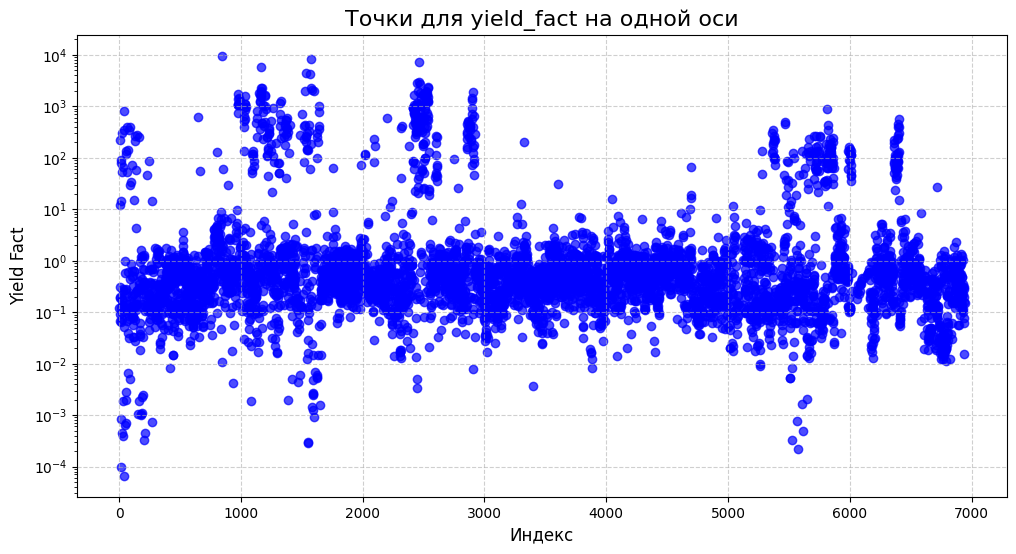

In [8]:
import matplotlib.pyplot as plt

x = range(len(df))

plt.figure(figsize=(12, 6))
plt.scatter(x, df['yield_fact'], color='blue', alpha=0.7)

plt.title('Точки для yield_fact на одной оси', fontsize=16)
plt.xlabel('Индекс', fontsize=12)
plt.ylabel('Yield Fact', fontsize=12)
plt.yscale('log')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

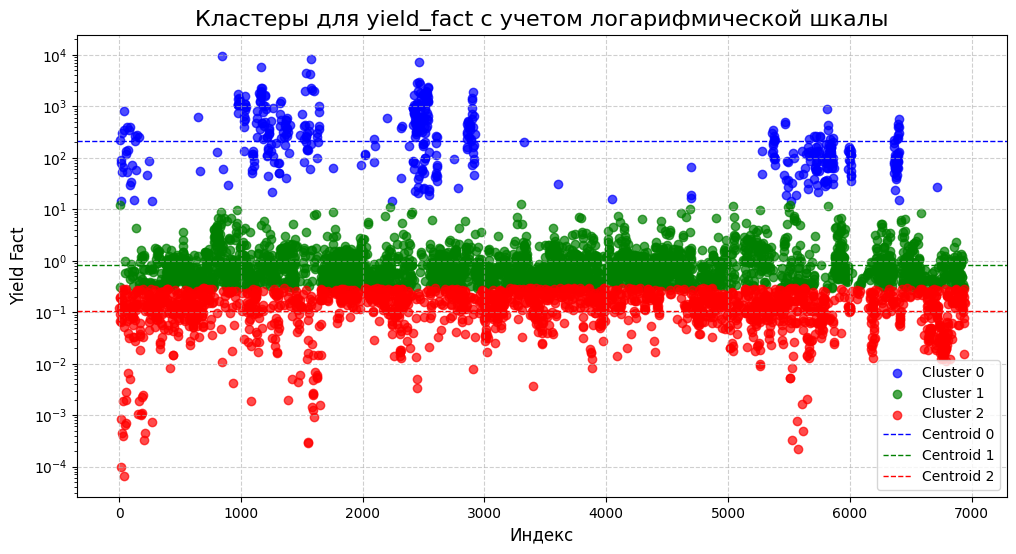

In [19]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df['log_yield_fact'] = np.log10(df['yield_fact'].replace(0, np.nan)).fillna(0)  # Заменяем 0 на NaN, лог(0) невозможен

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['log_yield_fact']])

centroids = kmeans.cluster_centers_

plt.figure(figsize=(12, 6))
colors = ['blue', 'green', 'red']

for cluster in range(3):
    cluster_data = df[df['cluster'] == cluster]
    plt.scatter(cluster_data.index, cluster_data['yield_fact'], 
                alpha=0.7, color=colors[cluster], label=f'Cluster {cluster}')

for i, centroid in enumerate(centroids):
    original_scale_centroid = 10**centroid[0]
    plt.axhline(original_scale_centroid, color=colors[i], linestyle='--', linewidth=1, label=f'Centroid {i}')

plt.title('Кластеры для yield_fact с учетом логарифмической шкалы', fontsize=16)
plt.xlabel('Индекс', fontsize=12)
plt.ylabel('Yield Fact', fontsize=12)
plt.yscale('log')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

In [20]:
df = pd.read_csv('field_avg_yield_plan.csv')

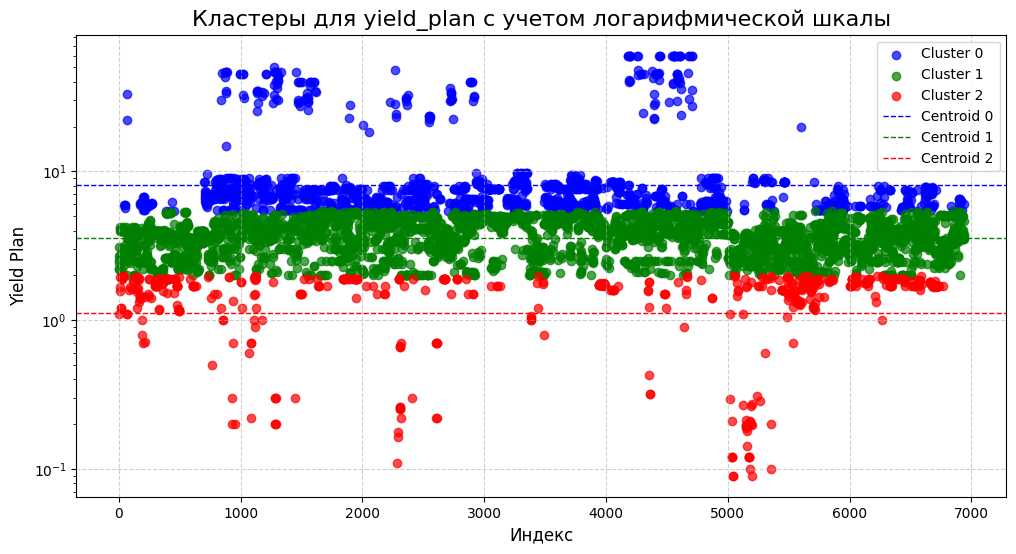

In [21]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df['log_yield_plan'] = np.log10(df['yield_plan'].replace(0, np.nan)).fillna(0)  # Заменяем 0 на NaN, лог(0) невозможен

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['log_yield_plan']])

centroids = kmeans.cluster_centers_

plt.figure(figsize=(12, 6))
colors = ['blue', 'green', 'red']

for cluster in range(3):
    cluster_data = df[df['cluster'] == cluster]
    plt.scatter(cluster_data.index, cluster_data['yield_plan'], 
                alpha=0.7, color=colors[cluster], label=f'Cluster {cluster}')

for i, centroid in enumerate(centroids):
    original_scale_centroid = 10**centroid[0]
    plt.axhline(original_scale_centroid, color=colors[i], linestyle='--', linewidth=1, label=f'Centroid {i}')

plt.title('Кластеры для yield_plan с учетом логарифмической шкалы', fontsize=16)
plt.xlabel('Индекс', fontsize=12)
plt.ylabel('Yield Plan', fontsize=12)
plt.yscale('log')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()